## Домашнее задание


### 1. Хотим пятерку, а на деле...

Кластеризуйте данный датасет с помощью метода `k-means`. На основе трёх различных __внутренних__ метрик оценки кластеризации, подберите наилучшее количество кластеров $k$.



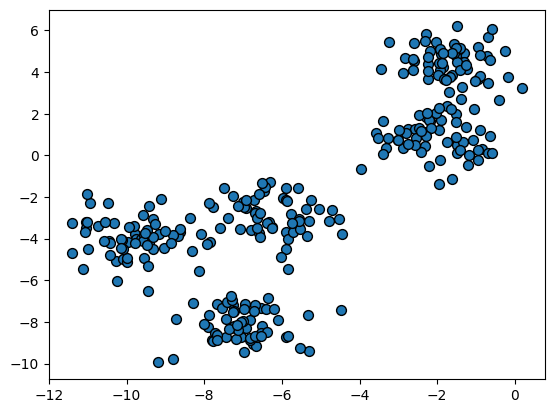

In [1]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

X, y = make_blobs(n_samples=300, centers=5, cluster_std=0.85, random_state=1)
plt.scatter(X[:, 0], X[:, 1], s=50, edgecolor='k')
plt.show()

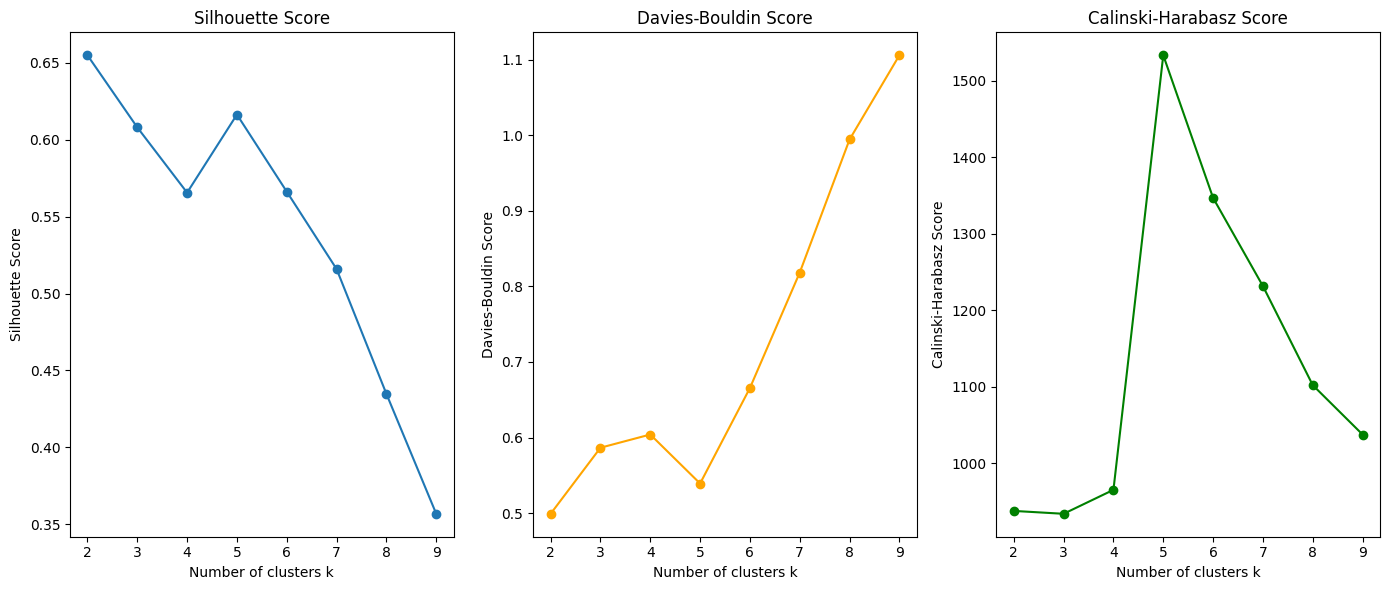

In [2]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import matplotlib.pyplot as plt


k_values = range(2, 10)

silhouette_scores = []
davies_bouldin_scores = []
calinski_harabasz_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=1)
    labels = kmeans.fit_predict(X)
    
    # Внутренние метрики
    silhouette_scores.append(silhouette_score(X, labels))
    davies_bouldin_scores.append(davies_bouldin_score(X, labels))
    calinski_harabasz_scores.append(calinski_harabasz_score(X, labels))

# Визуализация метрик
plt.figure(figsize=(14, 6))

plt.subplot(1, 3, 1)
plt.plot(k_values, silhouette_scores, marker='o')
plt.title("Silhouette Score")
plt.xlabel("Number of clusters k")
plt.ylabel("Silhouette Score")

plt.subplot(1, 3, 2)
plt.plot(k_values, davies_bouldin_scores, marker='o', color='orange')
plt.title("Davies-Bouldin Score")
plt.xlabel("Number of clusters k")
plt.ylabel("Davies-Bouldin Score")

plt.subplot(1, 3, 3)
plt.plot(k_values, calinski_harabasz_scores, marker='o', color='green')
plt.title("Calinski-Harabasz Score")
plt.xlabel("Number of clusters k")
plt.ylabel("Calinski-Harabasz Score")

plt.tight_layout()
plt.show()

### 2. Повторение - мать ученья

Для предыдущего датасета подберите наилучшие гиперпараметры (мера несходства) с использованием агломеративного метода. Постройте дендрограмму для наилучшей модели. 

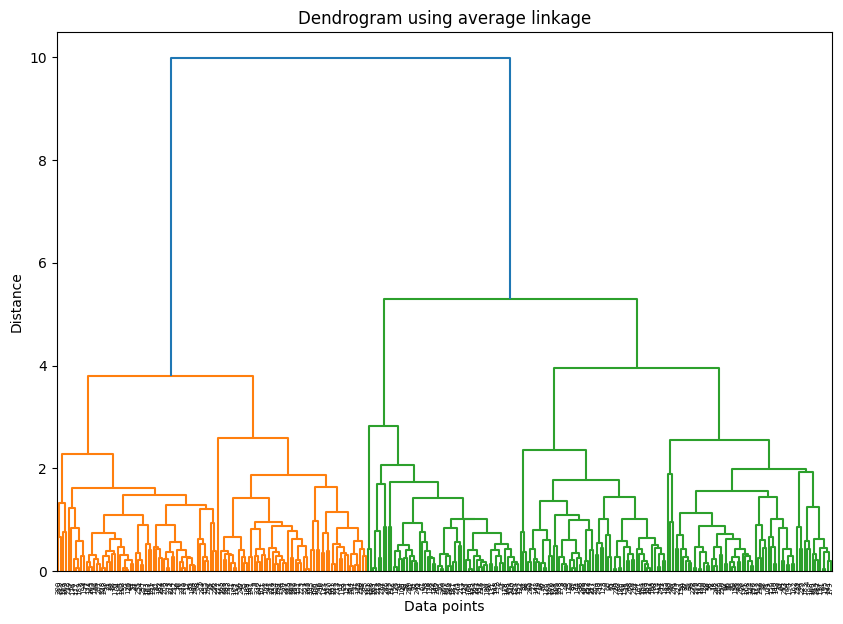

('average', np.float64(0.6144222457721612))

In [3]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np

# Метрики несходства
linkage_methods = ['ward', 'complete', 'average', 'single']

# Оценка качества кластеризации для разных методов связи
best_score = -np.inf
best_method = None
best_labels = None

# Пробуем различные методы агломеративной кластеризации и оцениваем их с помощью silhouette_score
for method in linkage_methods:
    agglomerative = AgglomerativeClustering(n_clusters=5, linkage=method)
    labels = agglomerative.fit_predict(X)
    score = silhouette_score(X, labels)
    if score > best_score:
        best_score = score
        best_method = method
        best_labels = labels

# Построение дендрограммы для наилучшей модели
linked = linkage(X, method=best_method)

plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.title(f"Dendrogram using {best_method} linkage")
plt.xlabel("Data points")
plt.ylabel("Distance")
plt.show()

best_method, best_score

### 3. Матрица расстояний (смежности) и матрица сходств

Расстояния между парами векторов из двух множеств $d\left(X_l, X_j\right)$ могут быть представлены в виде симметричной матрицы расстояний (матрица смежности):

$$
D=\left(\begin{array}{cccc}
0 & d_{12} & \ldots & d_{1 n} \\
d_{21} & 0 & \ldots & d_{2n} \\
\ldots & \ldots & \ldots & \ldots \\
d_{n 1} & d_{n 2} & \ldots & 0
\end{array}\right)
$$

Понятием, противоположным расстоянию, является понятие сходства между объектами. Неотрицательная вещественная функция $S\left(x_i , x_j\right)=S_{i j}$ называется __мерой сходства__, если:


1) $0 \leq S\left(x_i, x_j\right)<1$ для $x_i \neq x_j$

2) $S\left(x_i, x_i\right)=1$

3) $S\left(x_i, x_j\right)=S\left(x_j, x_i\right)$

Пары значений мер сходства можно объединить в __матрицу сходства__:

$$
S=\left(\begin{array}{cccc}
1 & s_{12} & \ldots & s_{1 n} \\
s_{21} & 1 & \ldots & s_{2 n} \\
s_{n 1} &  s_{n 2} & \ldots & 1
\end{array}\right)
$$

Величину $S_{i j}$ называют __коэффициентом сходства__.

Постройте матрицу смежности по датасету первой задачи, взяв в качестве меры расстояния евклидову метрику.

Постройте на основе неё какую-нибудь матрицу сходства (вам надо самим придумать функцию сходства - просто удовлетвроите трём свойствам).

Визуализируйте обе матрицы в виде картинки. Используйте imshow() или pcolormesh() из Matplotlib.

Для получения матриц используйте функцию  [sklearn.metrics.pairwise_distances ](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise_distances.html#sklearn.metrics.pairwise_distances) (тут можно в качестве метрики использовать свою собственную функцию - так можно сделать матрицу сходств) или какую-то другую отсюда https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics.pairwise

Можно также посмотреть здесь https://scikit-learn.org/stable/modules/classes.html#module-sklearn.neighbors , например, функцию neighbors.[kneighbors_graph](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.kneighbors_graph.html#sklearn.neighbors.kneighbors_graph) 

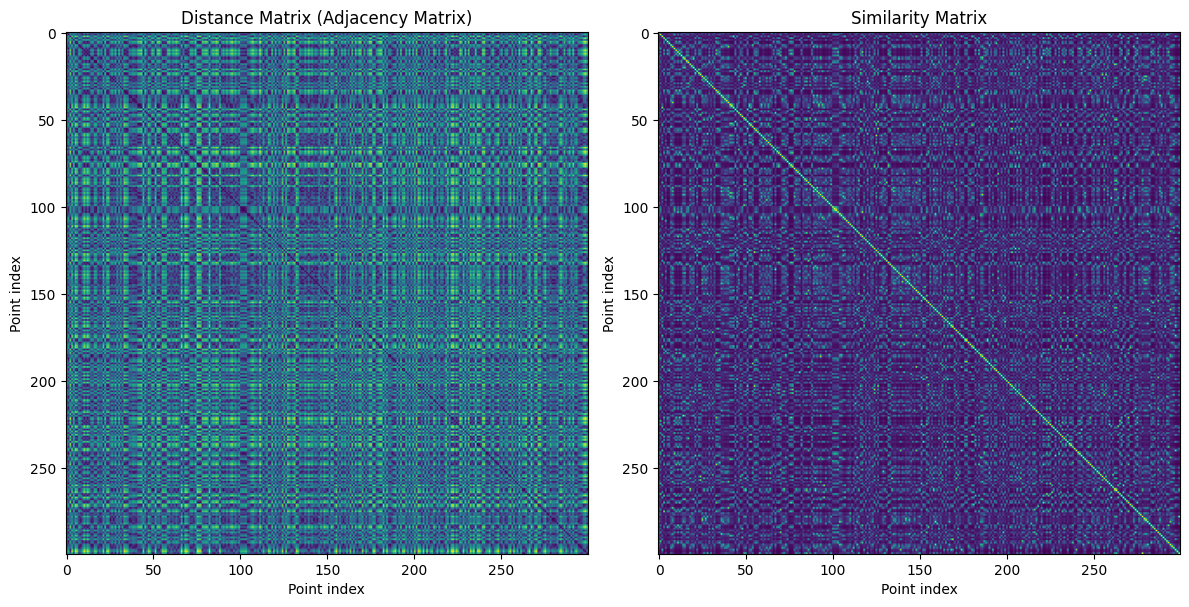

In [4]:


from sklearn.metrics import pairwise_distances



distance_matrix = pairwise_distances(X, metric="euclidean")


# Введем сходство как: S(x_i, x_j) = 1 / (1 + d(x_i, x_j)), где d(x_i, x_j) - евклидово расстояние
# Это обеспечивает, что S(x_i, x_i) = 1, S(x_i, x_j) = S(x_j, x_i), и S(x_i, x_j) < 1 для x_i != x_j
similarity_matrix = 1 / (1 + distance_matrix)

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Визуализация матрицы расстояний
ax[0].imshow(distance_matrix, cmap='viridis')
ax[0].set_title("Distance Matrix (Adjacency Matrix)")
ax[0].set_xlabel("Point index")
ax[0].set_ylabel("Point index")

# Визуализация матрицы сходства
ax[1].imshow(similarity_matrix, cmap='viridis')
ax[1].set_title("Similarity Matrix")
ax[1].set_xlabel("Point index")
ax[1].set_ylabel("Point index")

plt.tight_layout()
plt.show()



### 4. Игрушечные галактики (Источник - Pelican :))

Следующий датасет содержит координаты в 3д некоторого набора галактик. Необходимо найти скопления этих самых галактик с помощью алгоритма `hdbscan` - смеси обычного dbscan и иерархического подхода. Точная формулировка задачи после кода.

Вам понадобится файл toy_galaxies.csv из гугл диска.

,x,y,z,label
0,-35.283431,-21.779673,-113.964124,1.0
1,-35.603636,-18.430420,-113.298009,1.0
2,-34.202934,-22.362906,-106.979709,1.0


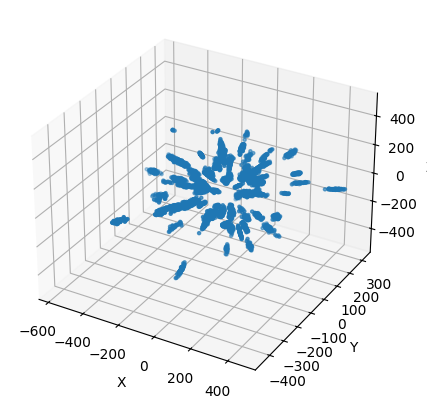

In [5]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
#!pip install hdbscan
import hdbscan
from sklearn.metrics import adjusted_rand_score as ari
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import MeanShift, AgglomerativeClustering


data = pd.read_csv("toy_galaxies.csv") # Не забудьте скачать файл
display(data.head(3))

# Отобразим датасет
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='3d')
Axes3D.scatter(ax, data.x,data.y,data.z, marker='.')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

In [6]:
# Эта функция понадобится для отображения результата кластеризации и ARI
def plot_galaxies(data,cluster):
    fig = plt.figure(figsize=(5,5))

    ax = fig.add_subplot(111, projection='3d')
    Axes3D.scatter(ax,data.x, data.y, data.z, marker='.', c=cluster.labels_);
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.show();

    ARI = round(ari(data.label,cluster.labels_),4) # считаем ARI - оценка качества кластеризации


    print('ARI = {}'.format(ARI))

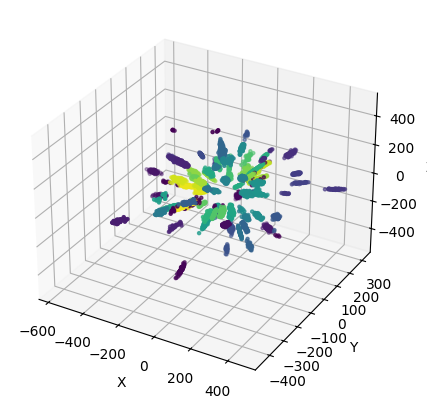

ARI = 0.908


In [7]:
# hdbscan работает следующим образом
cluster = hdbscan.HDBSCAN(metric="euclidean",
                          min_cluster_size=11,
                          algorithm="generic",
                          alpha=0.7,
                          cluster_selection_method='eom')

cluster.fit(data[['x','y','z']].to_numpy())

plot_galaxies(data,cluster) # Отображаем кластеризацию и полученный ARI

__Ваша задача__ - перебирать различные параметры hdbscan (метрику, минимальный размер кластера и т.д. - надо залезть в документацию hdbscan и посмотреть, что там реализовано), чтобы получить `ARI 0.900` (а вообще, чем больше, тем лучше - удивите нас).

### 5. *EM-алгоритм

Задача матричного разложения (аппроксимация матрицы произведением двух других матриц меньшего ранга) с ограничениями (например, условие положительности элементов) не решается в общем случае с помощью сингулярного разложения. Для решения такой задачи может использоваться ЕМ-алгоритм. Изучим его на примере другой простой модельной задачи.

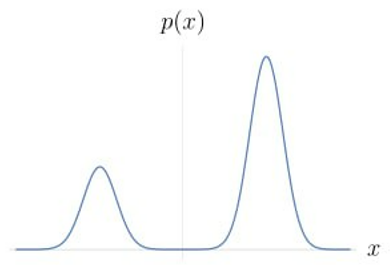

Пусть дана выборка точек $x_i$, взятая из смеси гауссовых распределений:

$$
p(x)=\alpha \cdot \mathcal{N}_{\mu_1, \sigma_1}(x)+(1-\alpha) \cdot \mathcal{N}_{\mu_2, \sigma_2}(x) .
$$

Тогда можно поставить задачу оценки параметров $\alpha, \mu_1, \mu_2, \sigma_1, \sigma_2$ по выборке $\left\{x_i\right\}$.
- Покажите, что задача максимизации обычного правдоподобия $\prod_i p\left(x_i\right) \longrightarrow \max _{\alpha, \mu_1, \mu_2}$ плохо определена. Какие значения параметров максимизируют такое правдоподобие?
- Сгенерируйте данные (просто два сгустка точек, хорошо видных при реализации) и найдите параметры $\alpha, \mu_1, \mu_2, \sigma_1, \sigma_2$ с помощью ЕМ-алгоритма. Инициализировать параметры можно какими-то случайными значениями.
ЕМ-алгоритм состоит из двух чередующихся шагов:
>1. M(Maximization)-шаг. Относим каждую точку $x_i$ к первой или второй гауссиане, сравнивая значения правдоподобия для каждой компоненты смеси:
>
>$$
a\left(x_i\right)= \begin{cases}1, & p_1\left(x_i\right)>p_2\left(x_i\right), \\ 2, & p_2\left(x_i\right)>p_1\left(x_i\right),\end{cases}
$$
>
>где $p_1(x)=\alpha \mathcal{N}_{\mu_1, \sigma_1}(x), \; \; p_2(x)=(1-\alpha) \mathcal{N}_{\mu_2, \sigma_2}(x)$.
>
>2. E( Expectation)-шаг. Находим параметры $\mu_1, \sigma_1$ и $\mu_2, \sigma_2$, максимизируя правдоподобие (или его логарифм) отдельно по точкам, отнесенным к каждой гауссиане:
>
>$$
\begin{gathered}
\prod_{x_i: a\left(x_i\right)=1} p_1\left(x_i\right) \longrightarrow \max _{\mu_1, \sigma_1} \\
\prod_{x_i: a\left(x_i\right)=2} p_2\left(x_i\right) \longrightarrow \max _{\mu_2, \sigma_2}
\end{gathered}
$$

__Примечание.__ При нахождении параметра $\alpha$ можно оптимизировать обычное правдоподобие $\prod_i p\left(x_i\right)$. Все такие максимизации правдоподобия осушествляются аналитически в общем виде для гауссовых распределений. 

__Реализуйте ЕМ-алгоритм.__ Так как метод является итерационным, необходимо выбрать какой-либо критерий остановки, например, прекращать процес, если относительное изменение каждого параметра при очередном шаге меньше некоторого порога. С какой точностью удалось восстановить $\alpha, \mu_1, \mu_2, \sigma_1, \sigma_2$ ?

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm


# Генерация данных
n1 = 100
n2 = 50
mu1_true = 0
sigma1_true = 1
mu2_true = 5
sigma2_true = 1
alpha_true = n1 / (n1 + n2)

x1 = np.random.normal(mu1_true, sigma1_true, n1)
x2 = np.random.normal(mu2_true, sigma2_true, n2)
x = np.concatenate([x1, x2])


def em_algorithm(x, alpha_init, mu1_init, mu2_init, sigma1_init, sigma2_init, tol=1e-4, max_iter=1000):
    n = len(x)
    alpha = alpha_init
    mu1 = mu1_init
    mu2 = mu2_init
    sigma1 = sigma1_init
    sigma2 = sigma2_init

    for _ in range(max_iter):
        # E-шаг (вычисление скрытых переменных)
        gamma1 = alpha * norm.pdf(x, mu1, sigma1)
        gamma2 = (1 - alpha) * norm.pdf(x, mu2, sigma2)
        gamma_sum = gamma1 + gamma2
        gamma1 /= gamma_sum
        gamma2 /= gamma_sum

        # M-шаг (обновление параметров)
        n1 = np.sum(gamma1)
        n2 = np.sum(gamma2)
        alpha_new = n1 / n
        mu1_new = np.sum(gamma1 * x) / n1
        mu2_new = np.sum(gamma2 * x) / n2
        sigma1_new = np.sqrt(np.sum(gamma1 * (x - mu1_new)**2) / n1)
        sigma2_new = np.sqrt(np.sum(gamma2 * (x - mu2_new)**2) / n2)

        # Критерий остановки
        if (np.abs(alpha_new - alpha) < tol and
            np.abs(mu1_new - mu1) < tol and
            np.abs(mu2_new - mu2) < tol and
            np.abs(sigma1_new - sigma1) < tol and
            np.abs(sigma2_new - sigma2) < tol):
            break

        alpha = alpha_new
        mu1 = mu1_new
        mu2 = mu2_new
        sigma1 = sigma1_new
        sigma2 = sigma2_new

    return alpha, mu1, mu2, sigma1, sigma2


alpha_init = 0.5
mu1_init = np.min(x)
mu2_init = np.max(x) 
sigma1_init = np.std(x)
sigma2_init = np.std(x)

alpha, mu1, mu2, sigma1, sigma2 = em_algorithm(x, alpha_init, mu1_init, mu2_init, sigma1_init, sigma2_init)

print(f"alpha: {alpha:.4f} (true: {alpha_true:.4f})")
print(f"mu1: {mu1:.4f} (true: {mu1_true:.4f})")
print(f"mu2: {mu2:.4f} (true: {mu2_true:.4f})")
print(f"sigma1: {sigma1:.4f} (true: {sigma1_true:.4f})")
print(f"sigma2: {sigma2:.4f} (true: {sigma2_true:.4f})")

alpha: 0.6757 (true: 0.6667)
mu1: 0.2215 (true: 0.0000)
mu2: 4.6874 (true: 5.0000)
sigma1: 1.0579 (true: 1.0000)
sigma2: 0.8210 (true: 1.0000)
